#### Project 4: Maslin Farrell

Importing necessary libraries

In [52]:
import Characters #Where the prototypes and their noisy variations are stored
import numpy as np 
import pandas as pd
from sklearn.svm import SVC #C-Support Vector Classification.
import matplotlib.pyplot as plt 
import sklearn.metrics as metrics # Used for displaying results

from sklearn.neural_network import MLPClassifier # MLP classifier
from sklearn.neighbors import KNeighborsClassifier # k-NN algorithm
from sklearn.ensemble import RandomForestClassifier #Random Forest Algorithm
from sklearn.model_selection import train_test_split, GridSearchCV # used for splitting data into training and testing sets

Letter Array processing

In [53]:
# Randomly pick the letter to use on the letter set
randLetter = np.random.randint(1,10)

#Create training and testing sets using Scikit's train_test_split ensures no overlap and randomly chosen
# ___DataSet is the X value in k-NN and RandomForest
# ___Noise is the Y value in k-NN and RandomForest
trainDataSet, testDataSet = train_test_split(Characters.letters[9], test_size=0.4, random_state=True) # splits 40% for testing 60% for training

#Create training targets
trainTarget = [0,0,1,1,1,1]
testTarget = [0,1,1,1]

print(f"Training and Testing with {Characters.printPickedLetter(9)}")

Training and Testing with letter set: J


### MLP

In [54]:
# Parameter Grid used for GridSearch on MLP
# Hidden layer size, activation, solver, and learning rate had three different options, narrowed down to 1 that was consist across 20 tests  (120,80,40)
# 0.001 proved to be the most consistent out of 0.5, 0.05, 0.005, 0.0005, 0.01, 0.0001
# Max iteration narrowed down to 150 (100, 250 where the other options, 150 was consistently the best)

#mlpParamGrid = {
#    'hidden_layer_sizes': [(150,100,50), (120,80,40)],
#    'max_iter': [100, 150, 200, 250, 300, 350],
#    'activation': ['tanh'], There were other options here I promise but I didn't write down what they were so for now believe me this is the best option
#    'solver': ['sgd'],There were other options here I promise but I didn't write down what they were so for now believe me this is the best option
#    'alpha': [0.5, 0.05, 0.005, 0.0005, 0.01, 0.0001],
#    'learning_rate': ['constant'], There were other options here I promise but I didn't write down what they were so for now believe me this is the best option
#}

In [78]:
mlpCLF = MLPClassifier(hidden_layer_sizes= (150,100,50), max_iter=150, activation='tanh', solver='sgd', alpha=0.0001) # Create mlp classifier
# mlpGrid = GridSearchCV(mlpCLF, mlpParamGrid, n_jobs=-1, cv=2) # No longer used just here to show we used it to find the best parameters
mlpCLF.fit(trainDataSet, trainTarget) # Fit the data
mlpPredictions = mlpCLF.predict(testDataSet)

c:\Users\Maslin\Documents\School\CS457\Project 4\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for MLP

In [56]:
print(f"Accuracy: {metrics.accuracy_score(testTarget, mlpPredictions)*100}%") # Print Accuracy of the model
print(f"Precision Score: {metrics.precision_score(testTarget, mlpPredictions)}") # Best value is 1 and worst is 0
print(f"F1 Score: {metrics.f1_score(testTarget, mlpPredictions)}") # F1 Score measures harmonic mean of the precision and recall
print(f"Recall Score: {metrics.recall_score(testTarget, mlpPredictions)}") # Recall measures the ability to find all positive samples, best is 1 worst is 0

mlpResults = list() # [0] = Accuracy, [1] = Precision Score, [2] = F1, [3] = Recall Score
mlpResults.append(metrics.accuracy_score(testTarget, mlpPredictions)*100)
mlpResults.append(metrics.precision_score(testTarget, mlpPredictions))
mlpResults.append(metrics.f1_score(testTarget, mlpPredictions))
mlpResults.append(metrics.recall_score(testTarget, mlpPredictions))

Accuracy: 100.0%
Precision Score: 1.0
F1 Score: 1.0
Recall Score: 1.0


Confusion Matrix for MLP

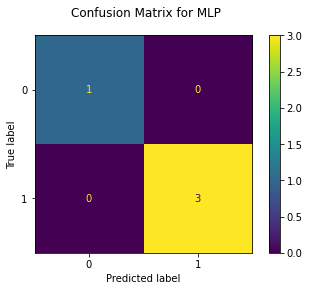

In [57]:
# Creates a Confusion Matrix
fig = metrics.ConfusionMatrixDisplay.from_predictions(testTarget, mlpPredictions)
fig.figure_.suptitle("Confusion Matrix for MLP") 
plt.show()

### K-Nearest Neighbor


In [58]:
#knnParamGrid = {
#    'n_neighbors': [1,2,3,4,5,6], # Tested as 'n_neighbors': [1,2,3,4,5,6], the best value was 3
#    'weights': ['uniform', 'distance'], # Tested as ['uniform', 'distance'], the best value was uniform
#    'metric': ['euclidean', 'manhattan', 'minkowski'], # Tested as ['euclidean', 'manhattan', 'minkowski'], the best value was euclidean
#    'leaf_size': [10, 30, 50, 70, 90, 100, 150, 200, 250] # Tested as [10, 30, 50, 70, 90, 100, 150, 200, 250], the best value was 10
#}

In [59]:
#Create KNN classifier
knnCLF = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean', leaf_size=10, n_jobs=-1) 

# Use grid search to find the best parameters
#knnGrid = GridSearchCV(knnCLF, knnParamGrid, n_jobs=-1, cv=2, verbose=1)  No longer used (just here to show how we used GridSearch)

#Train the model using training sets
knnCLF.fit(trainDataSet, trainTarget)
knnPredictions = knnCLF.predict(testDataSet)

Accuracy for K-Nearest Neighbor

In [60]:
print(f"Accuracy: {metrics.accuracy_score(testTarget, knnPredictions)*100}%") # Print Accuracy of the model
print(f"Precision Score: {metrics.precision_score(testTarget, knnPredictions)}") # Best value is 1 and worst is 0
print(f"F1 Score: {metrics.f1_score(testTarget, knnPredictions)}") # F1 Score measures harmonic mean of the precision and recall
print(f"Recall Score: {metrics.recall_score(testTarget, knnPredictions)}") # Recall measures the ability to find all positive samples, best is 1 worst is 0

knnResults = list() # [0] = Accuracy, [1] = Precision Score, [2] = F1, [3] = Recall Score
knnResults.append(metrics.accuracy_score(testTarget, knnPredictions)*100)
knnResults.append(metrics.precision_score(testTarget, knnPredictions))
knnResults.append(metrics.f1_score(testTarget, knnPredictions))
knnResults.append(metrics.recall_score(testTarget, knnPredictions))

Accuracy: 75.0%
Precision Score: 1.0
F1 Score: 0.8
Recall Score: 0.6666666666666666


Confusion Matrix for K-Nearest Neighbor

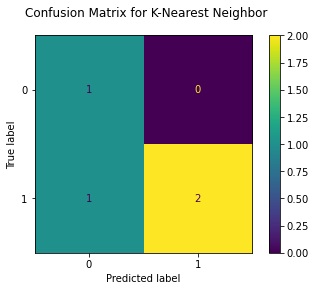

In [61]:
fig = metrics.ConfusionMatrixDisplay.from_predictions(testTarget, knnPredictions, labels=knnCLF.classes_) 
fig.figure_.suptitle("Confusion Matrix for K-Nearest Neighbor") 
plt.show()

### SVM

In [62]:
#SVM Parameter Grid used for GridSearch to "automatically" tune the hyperparameters
#svmParamGrid = {
#    'C': [0.1],  #Tested as: [0.1, 1, 10, 30, 50, 100, 300, 500, 1000], the best value was 0.1 across all letter sets
#    'kernel': ['linear'], #Tested as: [linear, rbf, sigmoid], the best value was linear across all letter sets
#    'gamma': [1], # Tested as: [1, 0.1, 0.01, 0.001, 0.0001] the best value was 1 across all letter sets
#}

In [79]:
svmCLF = SVC(C=.1, kernel='linear', gamma=1)
#svmGrid = GridSearchCV(svmCLF, svmParamGrid, cv=2, refit = True, n_jobs=-1, verbose=2) # No longer needed just showing we used it
svmCLF.fit(trainDataSet, trainTarget)
svmPredictions = svmCLF.predict(testDataSet)

Accuracy results for SVM

In [64]:
print(f"Accuracy: {metrics.accuracy_score(testTarget, svmPredictions)*100}%") # Print Accuracy of the model
print(f"Precision Score: {metrics.precision_score(testTarget, svmPredictions)}") # Best value is 1 and worst is 0
print(f"F1 Score: {metrics.f1_score(testTarget, svmPredictions)}") # F1 Score measures harmonic mean of the precision and recall
print(f"Recall Score: {metrics.recall_score(testTarget, svmPredictions)}") # Recall measures the ability to find all positive samples, best is 1 worst is 0

svmResults = list() # [0] = Accuracy, [1] = Precision Score, [2] = F1, [3] = Recall Score
svmResults.append(metrics.accuracy_score(testTarget, svmPredictions)*100)
svmResults.append(metrics.precision_score(testTarget, svmPredictions))
svmResults.append(metrics.f1_score(testTarget, svmPredictions))
svmResults.append(metrics.recall_score(testTarget, svmPredictions))

Accuracy: 100.0%
Precision Score: 1.0
F1 Score: 1.0
Recall Score: 1.0


SVM Confusion Matrix

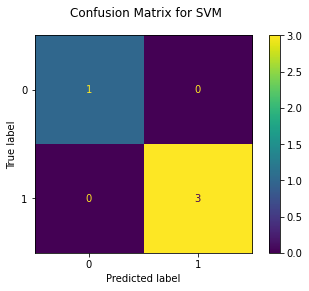

In [65]:
fig = metrics.ConfusionMatrixDisplay.from_predictions(testTarget, svmPredictions, labels=svmCLF.classes_) 
fig.figure_.suptitle("Confusion Matrix for SVM") 
plt.show()

### Random Forest

In [66]:
#Below is the Parameter Grid that was used to tune the model 
# Across all letter sets the best parameters were: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
#rfParamGrid = {
#    'n_estimators': [100, 300, 500, 700, 1000],
#    'criterion': ['gini', 'entropy', 'logo_loss'],
#    'max_features': ['sqrt', 'log2', 'None']
#}

In [67]:
rfCLF = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=100) # Create Random Forest Classifier using parameters from grid search
#rfGrid = GridSearchCV(rfCLF, rfParamGrid, n_jobs=-1, cv = 2, verbose=0) #No longer used since best parameters are consistent
rfCLF.fit(trainDataSet, trainTarget) #Fit the training data/target
rfPredictions = rfCLF.predict(testDataSet) # Make predictions

Accuracy Results for Random Forest

In [68]:
print(f"Accuracy: {metrics.accuracy_score(testTarget, rfPredictions)*100}%") # Print Accuracy of the model
print(f"Precision Score: {metrics.precision_score(testTarget, rfPredictions)}") # Best value is 1 and worst is 0
print(f"F1 Score: {metrics.f1_score(testTarget, rfPredictions)}") # F1 Score measures harmonic mean of the precision and recall
print(f"Recall Score: {metrics.recall_score(testTarget, rfPredictions)}") # Recall measures the ability to find all positive samples, best is 1 worst is 0

rfResults = list() # [0] = Accuracy, [1] = Precision Score, [2] = F1, [3] = Recall Score
rfResults.append(metrics.accuracy_score(testTarget, rfPredictions)*100)
rfResults.append(metrics.precision_score(testTarget, rfPredictions))
rfResults.append(metrics.f1_score(testTarget, rfPredictions))
rfResults.append(metrics.recall_score(testTarget, rfPredictions))

Accuracy: 100.0%
Precision Score: 1.0
F1 Score: 1.0
Recall Score: 1.0


Confusion Matrix for Random Forest

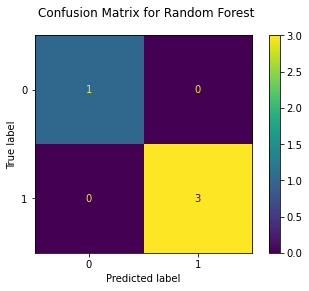

In [69]:
fig = metrics.ConfusionMatrixDisplay.from_predictions(testTarget, rfPredictions, labels=rfCLF.classes_) 
fig.figure_.suptitle("Confusion Matrix for Random Forest") 
plt.show()

### Result Analysis

In [70]:
allResults = np.array([mlpResults, knnResults, svmResults, rfResults])
df = pd.DataFrame(allResults, columns=["Accuracy Score", "Precision Score", "F1 Score", "Recall Score"], index=["MLP", "KNN", "SVM", "RF"])
df

,Accuracy Score,Precision Score,F1 Score,Recall Score
MLP,100.0,1.0,1.0,1.000000
KNN,75.0,1.0,0.8,0.666667
SVM,100.0,1.0,1.0,1.000000
RF,100.0,1.0,1.0,1.000000
